# Passing map analysis

In [14]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch

In [15]:
# read data
df = pd.read_csv('../data/processed_timelines.csv')

In [16]:
# ignore all other events than passes
df_passes = df[df['event_type'] == 'Shot']

In [17]:
# match_home_mask = (df_passes.match_id == 3275) & (df_passes.team == 'Away') & (df_passes.period == 2)
# df_passes = df_passes.loc[match_home_mask, ['start_position_x', 'start_position_y', 'end_position_x', 'end_position_y', 'result']]

In [18]:
# df_passes[df_passes['match_id'] == 1257]

In [19]:
for match_id in df_passes['match_id'].unique():
    match_home_mask_1 = (df_passes.match_id == match_id) & (df_passes.team == 'Home') & (df_passes.period == 1)
    shot_avg_x_1 = df_passes.loc[match_home_mask_1, 'start_position_x'].mean()
    match_home_mask_2 = (df_passes.match_id == match_id) & (df_passes.team == 'Home') & (df_passes.period == 2)
    shot_avg_x_2 = df_passes.loc[match_home_mask_2, 'start_position_x'].mean()
    

    match_away_mask_1 = (df_passes.match_id == match_id) & (df_passes.team == 'Away') & (df_passes.period == 1)
    a_shot_avg_x_1 = df_passes.loc[match_away_mask_1, 'start_position_x'].mean()
    match_away_mask_2 = (df_passes.match_id == match_id) & (df_passes.team == 'Away') & (df_passes.period == 2)
    a_shot_avg_x_2 = df_passes.loc[match_away_mask_2, 'start_position_x'].mean()
        
    if abs(shot_avg_x_2-shot_avg_x_1) > 40 or abs(a_shot_avg_x_2-a_shot_avg_x_1) > 40:
        if shot_avg_x_1 < 0 or a_shot_avg_x_1 > 0:
            print(match_id, abs(shot_avg_x_2-shot_avg_x_1), abs(a_shot_avg_x_2-a_shot_avg_x_1), shot_avg_x_1, "Home left first")
        else:
            print(match_id, abs(shot_avg_x_2-shot_avg_x_1), abs(a_shot_avg_x_2-a_shot_avg_x_1), shot_avg_x_1, "Away left first")

    

1292 nan 43.875 27.6 Away left first
1289 70.833 nan 37.155 Away left first
1272 nan 69.705 nan Away left first
1319 63.178999999999995 67.215 32.763999999999996 Away left first
1355 nan 75.19 34.845 Away left first
1389 nan 69.72 nan Home left first
2221 60.370000000000005 63.04333333333334 -33.13 Home left first
2211 82.05 nan 44.5 Away left first
2255 73.59259259259258 62.266313932980594 -40.76190476190476 Home left first
2248 66.30079365079365 65.0079365079365 35.01904761904761 Away left first
2247 45.2673721340388 2.8148148148148167 33.006349206349206 Away left first
2274 nan 64.70466666666667 -28.45 Home left first
2328 64.68 76.16999999999999 36.17 Away left first
3114 nan 71.7875 30.34 Away left first
3108 58.08833333333333 nan 37.93333333333333 Away left first
3098 74.48599999999999 70.174 32.696 Away left first
3162 56.067460317460316 49.43174603174603 29.865079365079364 Away left first
3153 70.83809523809524 52.544973544973544 -40.11111111111111 Home left first
3150 54.79894

In [20]:
# some matches are not normalized (meaning that home team always attacks to the right),
# check shich matches these are and normalize them

pos_vars = ['start_position_x', 'end_position_x', 'start_position_y', 'end_position_y']

for match_id in df_passes['match_id'].unique():
    match_id_mask_1 = (df['match_id'] == match_id) & (df['period'] == 1)
    match_id_mask_2 = (df['match_id'] == match_id) & (df['period'] == 2)
    match_home_mask_1 = (df_passes.match_id == match_id) & (df_passes.team == 'Home') & (df_passes.period == 1)
    shot_avg_x_1 = df_passes.loc[match_home_mask_1, 'start_position_x'].mean()
    match_home_mask_2 = (df_passes.match_id == match_id) & (df_passes.team == 'Home') & (df_passes.period == 2)
    shot_avg_x_2 = df_passes.loc[match_home_mask_2, 'start_position_x'].mean()
    

    match_away_mask_1 = (df_passes.match_id == match_id) & (df_passes.team == 'Away') & (df_passes.period == 1)
    a_shot_avg_x_1 = df_passes.loc[match_away_mask_1, 'start_position_x'].mean()
    match_away_mask_2 = (df_passes.match_id == match_id) & (df_passes.team == 'Away') & (df_passes.period == 2)
    a_shot_avg_x_2 = df_passes.loc[match_away_mask_2, 'start_position_x'].mean()
        
    if abs(shot_avg_x_2-shot_avg_x_1) > 40 or abs(a_shot_avg_x_2-a_shot_avg_x_1) > 40: # difference between shot starting locations in periods
        if shot_avg_x_1 < 0 or a_shot_avg_x_1 > 0:
            # change first period
            df.loc[match_id_mask_1, pos_vars] = df.loc[match_id_mask_1, pos_vars]*(-1)
        else:
            # change second period
            df.loc[match_id_mask_2, pos_vars] = df.loc[match_id_mask_2, pos_vars]*(-1)

In [21]:
df.loc[(df['event_type'] == 'Shot') & (df['team'] == 'Home') & (df['start_position_x'] < -10), 'match_id'].unique()

array([1278, 1300, 2247, 2284, 2277, 3132, 3120, 3108, 3104, 3152, 3194,
       3190, 3270, 3249, 3238, 3282, 3279], dtype=int64)

In [22]:
# df[(df['match_id'] == 2247) & (df['event_type'] == 'Shot')]

In [23]:
# define basic pitch creation
def create_pitch():

    # Customize the pitch
    pitch = Pitch(
        pitch_type='skillcorner', # Centered indexing
        pitch_length=100,
        pitch_width=63,
        pitch_color='gray',  # Background color
        line_color='black',   # Line color
        axis=True,
        label=False,
        stripe=False,          # Add stripes to the pitch
        corner_arcs=True,     # Draw corner arcs
        goal_type='box'
    )
    
    return pitch  

In [24]:
df_passes = df[df['event_type'] == 'Shot']

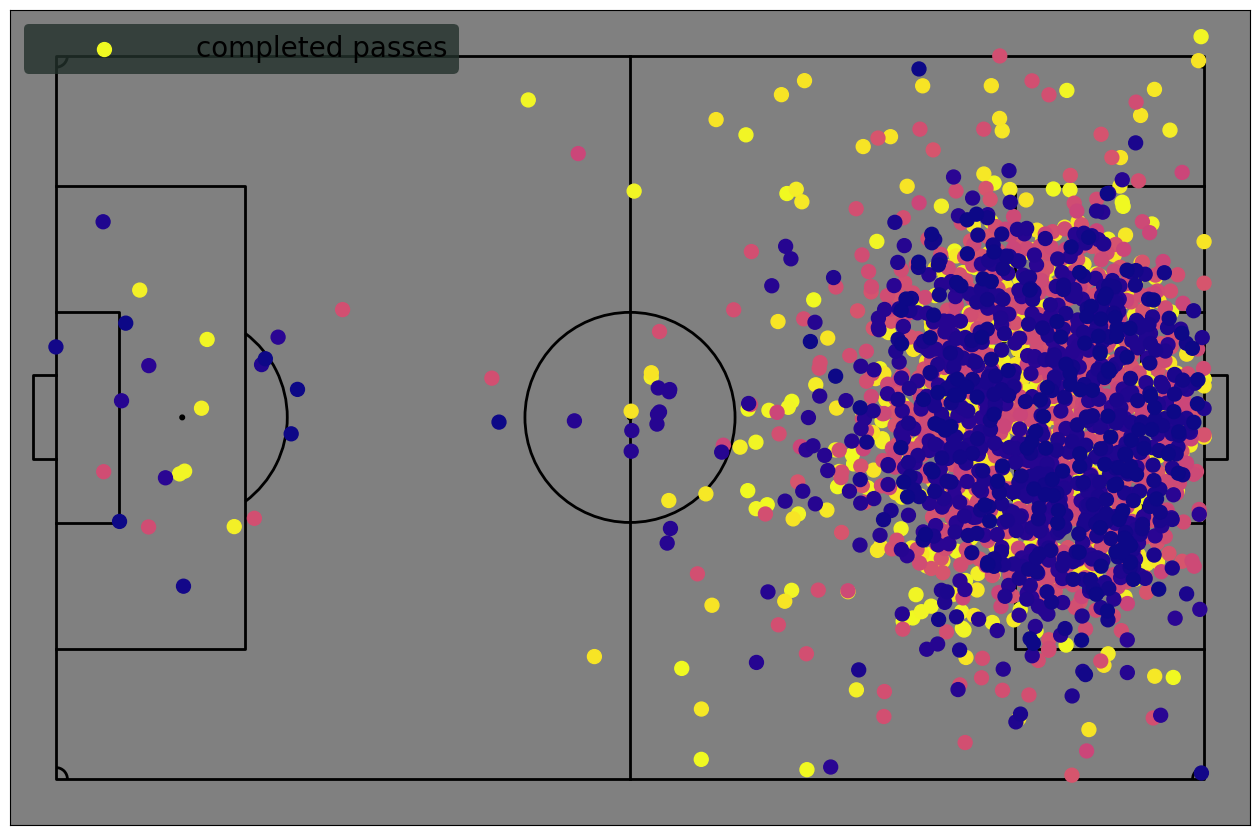

In [25]:
pitch = create_pitch()

fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)  # Adjust figure size

df_passes_home = df_passes[df_passes['team'] == 'Home']


# Plot the completed passes
pitch.scatter(df_passes_home.start_position_x, df_passes_home.start_position_y,
             s=100, cmap='plasma_r', c=df_passes_home.tournament_id, ax=ax, label='completed passes')


# Set up the legend
ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

In [26]:
matches = pd.read_csv('../data/match_info.csv')
dimensions = pd.read_csv('../data/pitch_dimensions.csv')

In [27]:
matches = matches.drop(columns=['home_team_int', 'away_team_int', 'int_level'])

In [28]:
comb = matches.merge(dimensions, on='match_id', how='inner')

In [29]:
comb[['age', 'pitch_length', 'pitch_width']].value_counts().reset_index(name='count')

,age,pitch_length,pitch_width,count
0,M14,100,63,87
1,M12,100,63,82
2,F14,100,63,74
3,F13,100,63,68
4,M13,100,63,65
5,F12,63,40,54
